In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import io
df = pd.read_csv('Restaurant.csv',usecols=['Name','Rating','Tweet','cuisines','Sentiment','Current_Rating'] )
df.head()

,Name,Rating,Tweet,cuisines,Sentiment,Current_Rating
0,Sandwich Shop,3.5,Average safe food. Not got ill. #FOODSAFE,"North Indian, European, Mediterranean, BBQ, Kebab",1,3.5
1,Sandwich Shop,2.8,Chicken inside the sandwich was #rotten and wa...,"North Indian, European, Mediterranean, BBQ, Kebab",1,2.8
2,Sandwich Shop,4.0,#SouthIndian sambhar tasted fantastic. Got eas...,"North Indian, European, Mediterranean, BBQ, Kebab",1,4.0
3,Sandwich Shop,2.0,#VEGMEAL took life of 5 children. #FOODSAFETY,"North Indian, European, Mediterranean, BBQ, Kebab",0,2.0
4,San Churro Cafe,3.2,#SouthIndian bada caused me #StomachAche and #...,"North Indian, European, Mediterranean, BBQ, Kebab",1,3.2


In [3]:
df.shape

(3013, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            3013 non-null   object 
 1   Rating          3013 non-null   float64
 2   Tweet           3013 non-null   object 
 3   cuisines        2835 non-null   object 
 4   Sentiment       3013 non-null   int64  
 5   Current_Rating  3013 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 141.4+ KB


In [5]:
X=df['Tweet']
y=df['Sentiment']

In [6]:
messages=X.copy()

In [7]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()
import nltk
nltk.download('stopwords')
corpus=[]
for i in range(len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages[i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suldutta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
corpus

['averag safe food got ill foodsaf',
 'chicken insid sandwich rotten badsmel sure shall get foodpoison',
 'southindian sambhar tast fantast got easili digest goodfood',
 'vegmeal took life children foodsafeti',
 'southindian bada caus stomachach vommiti',
 'averag tasti meal indigest occur foodsafeti',
 'healthi sugarfre sweet suitabl diabet patient',
 'fri momo yesterday caus nausea vommit foodpoison',
 'spici caus indigest stomachach foodpoison',
 'tasti cheap italian dish less effect health',
 'caus foodpoison stomachach foodsafeti',
 'peopl report diarrhea combo meal xo belgian waffl',
 'healthi sugarfre sweet suitabl diabet patient',
 'absolut unhealthi food could tast far better unsuit diabet patient eathealthi',
 'badfood unhealthi food money wast',
 'hard fri chicken puliyogar point near station caus diarrhea',
 'rotten smelli dish understand cook sure foodpoison',
 'peopl report diarrhea combo meal foodpoison',
 'caus foodpoison stomachach foodsafeti',
 'almost die foodpoison 

In [9]:
voc_size=5000
import tensorflow as tf

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [10]:
onehot_repr=[one_hot(words,voc_size) for words in corpus]
onehot_repr

[[3382, 3493, 2291, 453, 1290, 4166],
 [2336, 1582, 2260, 896, 1063, 3771, 4437, 178, 1900],
 [721, 2426, 2669, 1133, 453, 4499, 4139, 2472],
 [2361, 3751, 2559, 4520, 496],
 [721, 293, 2013, 3373, 408],
 [3382, 1047, 2003, 1354, 4550, 496],
 [686, 3155, 2375, 1615, 3585, 668],
 [839, 4956, 4043, 2013, 2906, 4866, 1900],
 [2743, 2013, 1354, 3373, 1900],
 [1047, 3157, 1267, 4737, 1937, 1558, 4859],
 [2013, 1900, 3373, 496],
 [3, 1692, 899, 4339, 2003, 2358, 4860, 4829],
 [686, 3155, 2375, 1615, 3585, 668],
 [2371, 4937, 2291, 727, 2669, 2311, 1905, 3613, 3585, 668, 2134],
 [518, 4937, 2291, 378, 1527],
 [3479, 839, 2336, 2353, 1183, 2208, 746, 2013, 899],
 [896, 3822, 4737, 3985, 1022, 3771, 1900],
 [3, 1692, 899, 4339, 2003, 1900],
 [2013, 1900, 3373, 496],
 [2471, 4737, 1900, 1600, 1275, 2003, 3498],
 [3037, 3951, 899, 677, 1434, 677],
 [3479, 839, 2336, 1434, 677, 2208, 746, 2013, 899],
 [3087, 3402, 1280, 453, 4369],
 [453, 3687, 4779, 2003, 453, 4369, 899, 3113, 21, 178, 551, 4922]

In [11]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  453 1290 4166]
 [   0    0    0 ... 4437  178 1900]
 [   0    0    0 ... 4499 4139 2472]
 ...
 [   0    0    0 ...  232  699 4220]
 [   0    0    0 ... 2995  937  585]
 [   0    0    0 ... 3822 1290  782]]


In [12]:
from tensorflow.keras.layers import Dropout
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.5))
model.add(LSTM(200))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
import numpy as np

X_final=np.array(embedded_docs)
y_final=np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.2,random_state=42)

In [15]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64)

Epoch 1/50
38/38 [==============================] - 7s 78ms/step - loss: 0.5182 - accuracy: 0.7203 - val_loss: 0.2388 - val_accuracy: 0.8939
Epoch 2/50
38/38 [==============================] - 2s 43ms/step - loss: 0.1506 - accuracy: 0.9332 - val_loss: 0.1219 - val_accuracy: 0.9619
Epoch 3/50
38/38 [==============================] - 2s 42ms/step - loss: 0.0953 - accuracy: 0.9593 - val_loss: 0.1213 - val_accuracy: 0.9502
Epoch 4/50
38/38 [==============================] - 2s 41ms/step - loss: 0.0687 - accuracy: 0.9730 - val_loss: 0.1218 - val_accuracy: 0.9585
Epoch 5/50
38/38 [==============================] - 2s 42ms/step - loss: 0.0640 - accuracy: 0.9726 - val_loss: 0.1194 - val_accuracy: 0.9585
Epoch 6/50
38/38 [==============================] - 2s 42ms/step - loss: 0.0564 - accuracy: 0.9763 - val_loss: 0.1416 - val_accuracy: 0.9569
Epoch 7/50
38/38 [==============================] - 2s 44ms/step - loss: 0.0524 - accuracy: 0.9780 - val_loss: 0.1025 - val_accuracy: 0.9602
Epoch 8/50
38

In [16]:
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

19/19 [==============================] - 1s 12ms/step
[1.   1.   0.   1.   0.   1.   1.   1.   1.   1.   0.   0.   1.   1.
 0.   0.94 0.   1.   0.   1.   1.   1.   0.24 1.   1.   1.   1.   0.96
 0.   1.   1.   1.   0.99 1.   1.   1.   1.   1.   0.   1.   0.   0.05
 0.   1.   0.   0.   0.01 0.   1.   0.   1.   1.   0.   0.37 1.   1.
 0.17 1.   0.   0.79 0.24 1.   0.   1.   0.01 1.   0.28 0.   0.   1.
 1.   0.24 0.01 0.   1.   1.   0.99 0.2  1.   0.   0.   0.   1.   0.
 1.   0.   1.   1.   1.   1.   0.   0.53 1.   1.   0.   1.   1.   0.
 1.   1.   1.   0.   1.   0.   1.   0.   0.03 0.52 1.   1.   0.   1.
 0.   0.   1.   0.87 1.   0.   0.   0.24 0.   0.   1.   1.   0.37 0.04
 0.   1.   1.   1.   0.   0.   0.   0.   1.   0.   0.   1.   1.   0.
 1.   0.   0.   1.   0.   0.02 1.   1.   1.   1.   1.   1.   1.   1.
 0.   0.   0.38 0.   0.   1.   1.   1.   1.   0.   0.   0.   0.01 0.
 1.   1.   1.   0.   0.   0.   0.52 0.   1.   0.47 1.   1.   1.   0.52
 1.   1.   0.   1.   1.   1.   1.   1.   

In [17]:
corpus1=[]
def predict(text):
  review1=re.sub('[^a-zA-Z]',' ',text)
  review1=review1.lower()
  review1=review1.split()
  review1=[ps.stem(word) for word in review1 if not word in stopwords.words('english')]
  review1=' '.join(review1)
  corpus1.append(review1)
  onehot_repr=[one_hot(words,voc_size) for words in corpus1]
  sent_length=20
  embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
  p_pred = model.predict(embedded_docs)
  p_pred = p_pred.flatten()
  y_pred = np.where(p_pred > 0.5, 1, 0)
  if(y_pred==1):
    print("Positive Statement")
  else:
    print("Negative Statement")
print("Enter a Statement")
text=input()
predict(text)

Enter a Statement
good food
1/1 [==============================] - 0s 44ms/step
Positive Statement


In [18]:
import numpy as np
from sklearn.metrics import f1_score
print('F1 Score',f1_score(y_test, y_pred))

F1 Score 0.9632892804698973


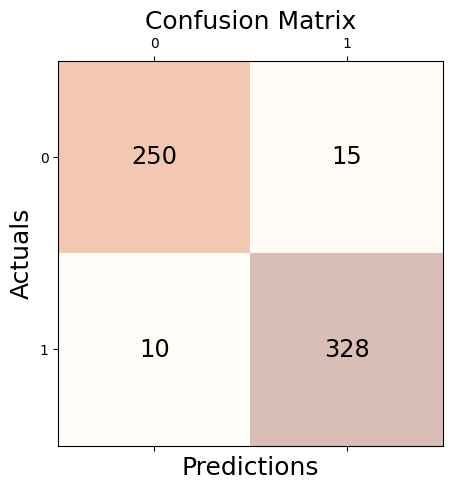

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [20]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.956


In [21]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.970


In [22]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.959


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       265
           1       0.96      0.97      0.96       338

    accuracy                           0.96       603
   macro avg       0.96      0.96      0.96       603
weighted avg       0.96      0.96      0.96       603



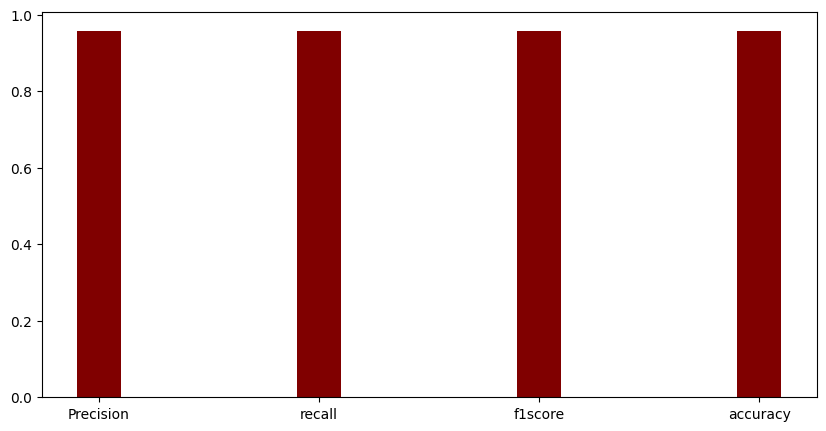

In [24]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True )
macro_precision=  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']
accuracy = report['accuracy']
from sklearn.metrics import precision_recall_fscore_support as score
data = {'Precision':macro_precision, 'recall':macro_recall, 'f1score':macro_f1,'accuracy':accuracy}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, color ='maroon',width = 0.2)
plt.show()